**Load the data and begin examining it**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#import data
data = pd.read_csv('data.csv')
#visualize
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


#Data Pre-Processing<br>

In [ ]:
#drop redundant column (year is essentially the same as realease data but in an object format)
data = data.drop('release_date', axis = 1)
#drop id column (we will encode the song names as id's)
data = data.drop('id', axis = 1)
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665


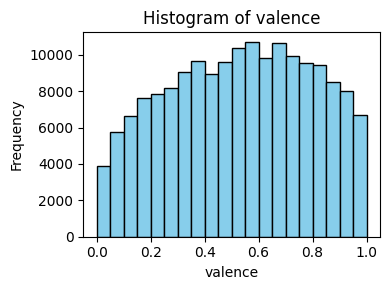

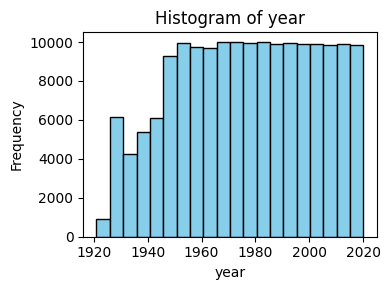

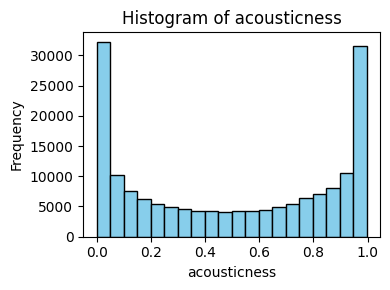

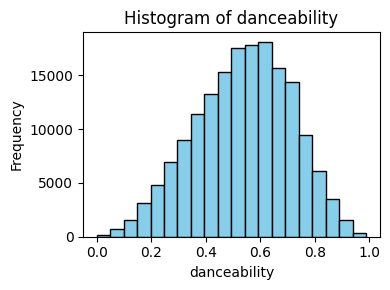

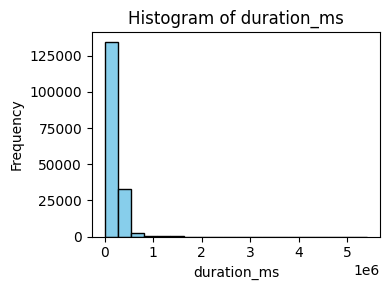

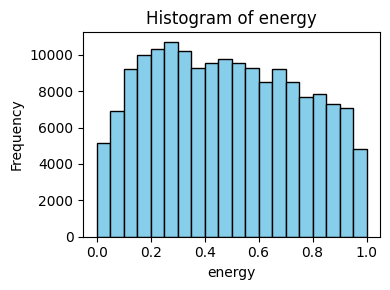

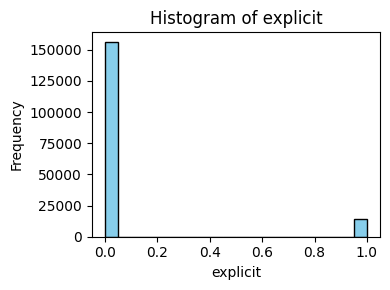

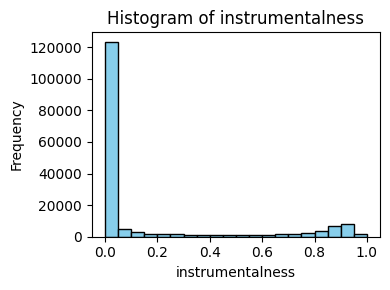

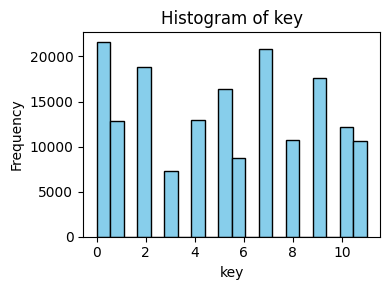

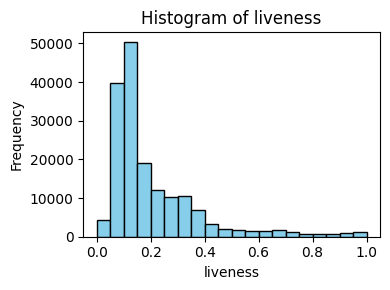

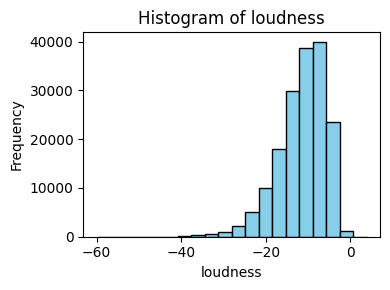

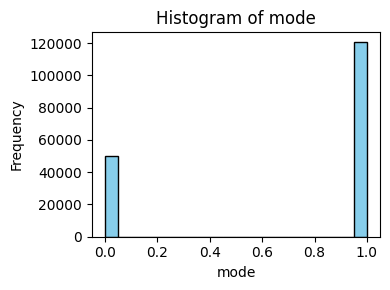

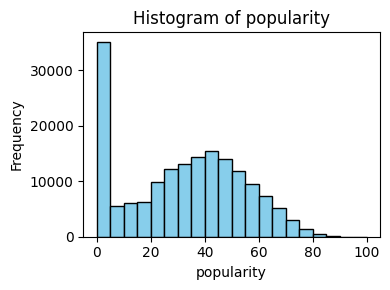

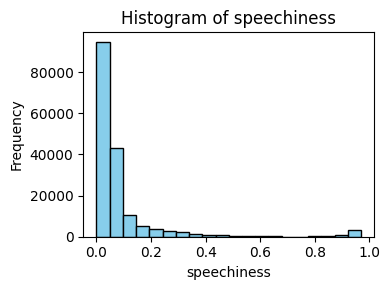

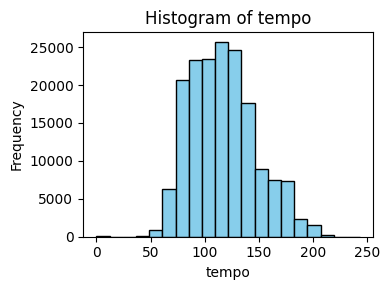

In [ ]:
#visualize numeric columns
numeric_cols = data.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(4, 3))
    plt.hist(data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Most of the numerical features are already scaled. The ones that are not are year, key, loudness, popularity, and tempo. All of these make sense to remain unscaled besides popularity, which also has a significant number

In [ ]:
#encode artists column
encoder = LabelEncoder()
data['artists'] = encoder.fit_transform(data['artists'])
#scale numerical columns

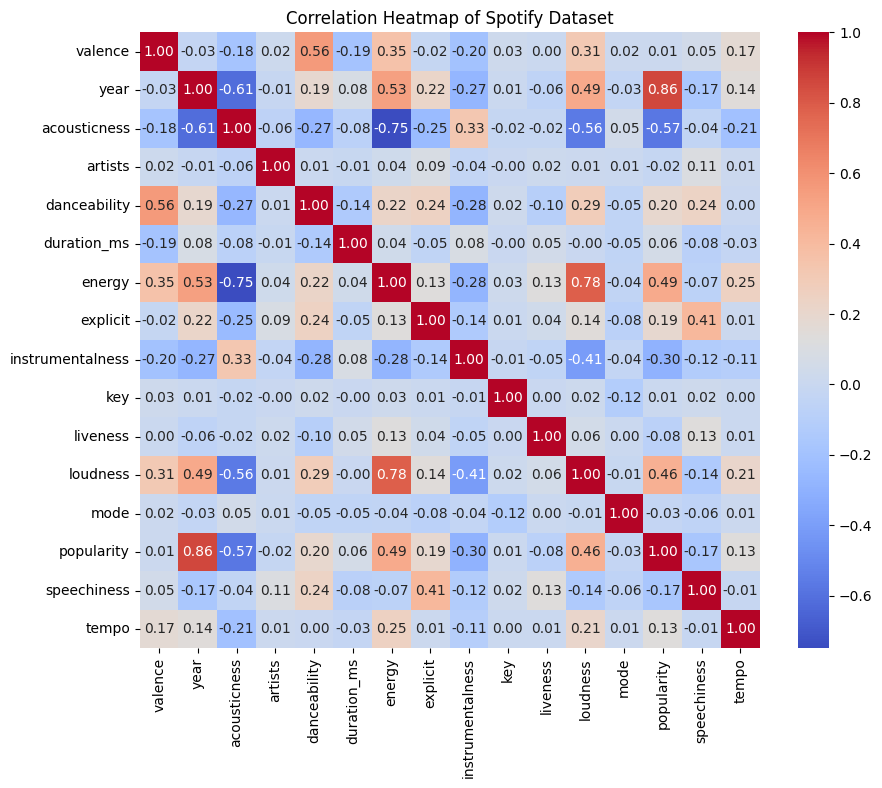

In [ ]:
#create a correlation heatmap to visualize correlations among the numerical data
corr_data = data.drop('name', axis = 1)
corrMatrix = corr_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap of Spotify Dataset')
plt.show()

#Data Visualization
**Elbow diagram and silouhette score from various cluster sizes**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#plot the inertia and silhouette score against various numbers of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    kmeans.fit(corr_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(corr_data, kmeans.labels_))
#plot elbow diagram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Diagram')
#plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

**Scatterplots to visualize PCA on various cluster sizes**

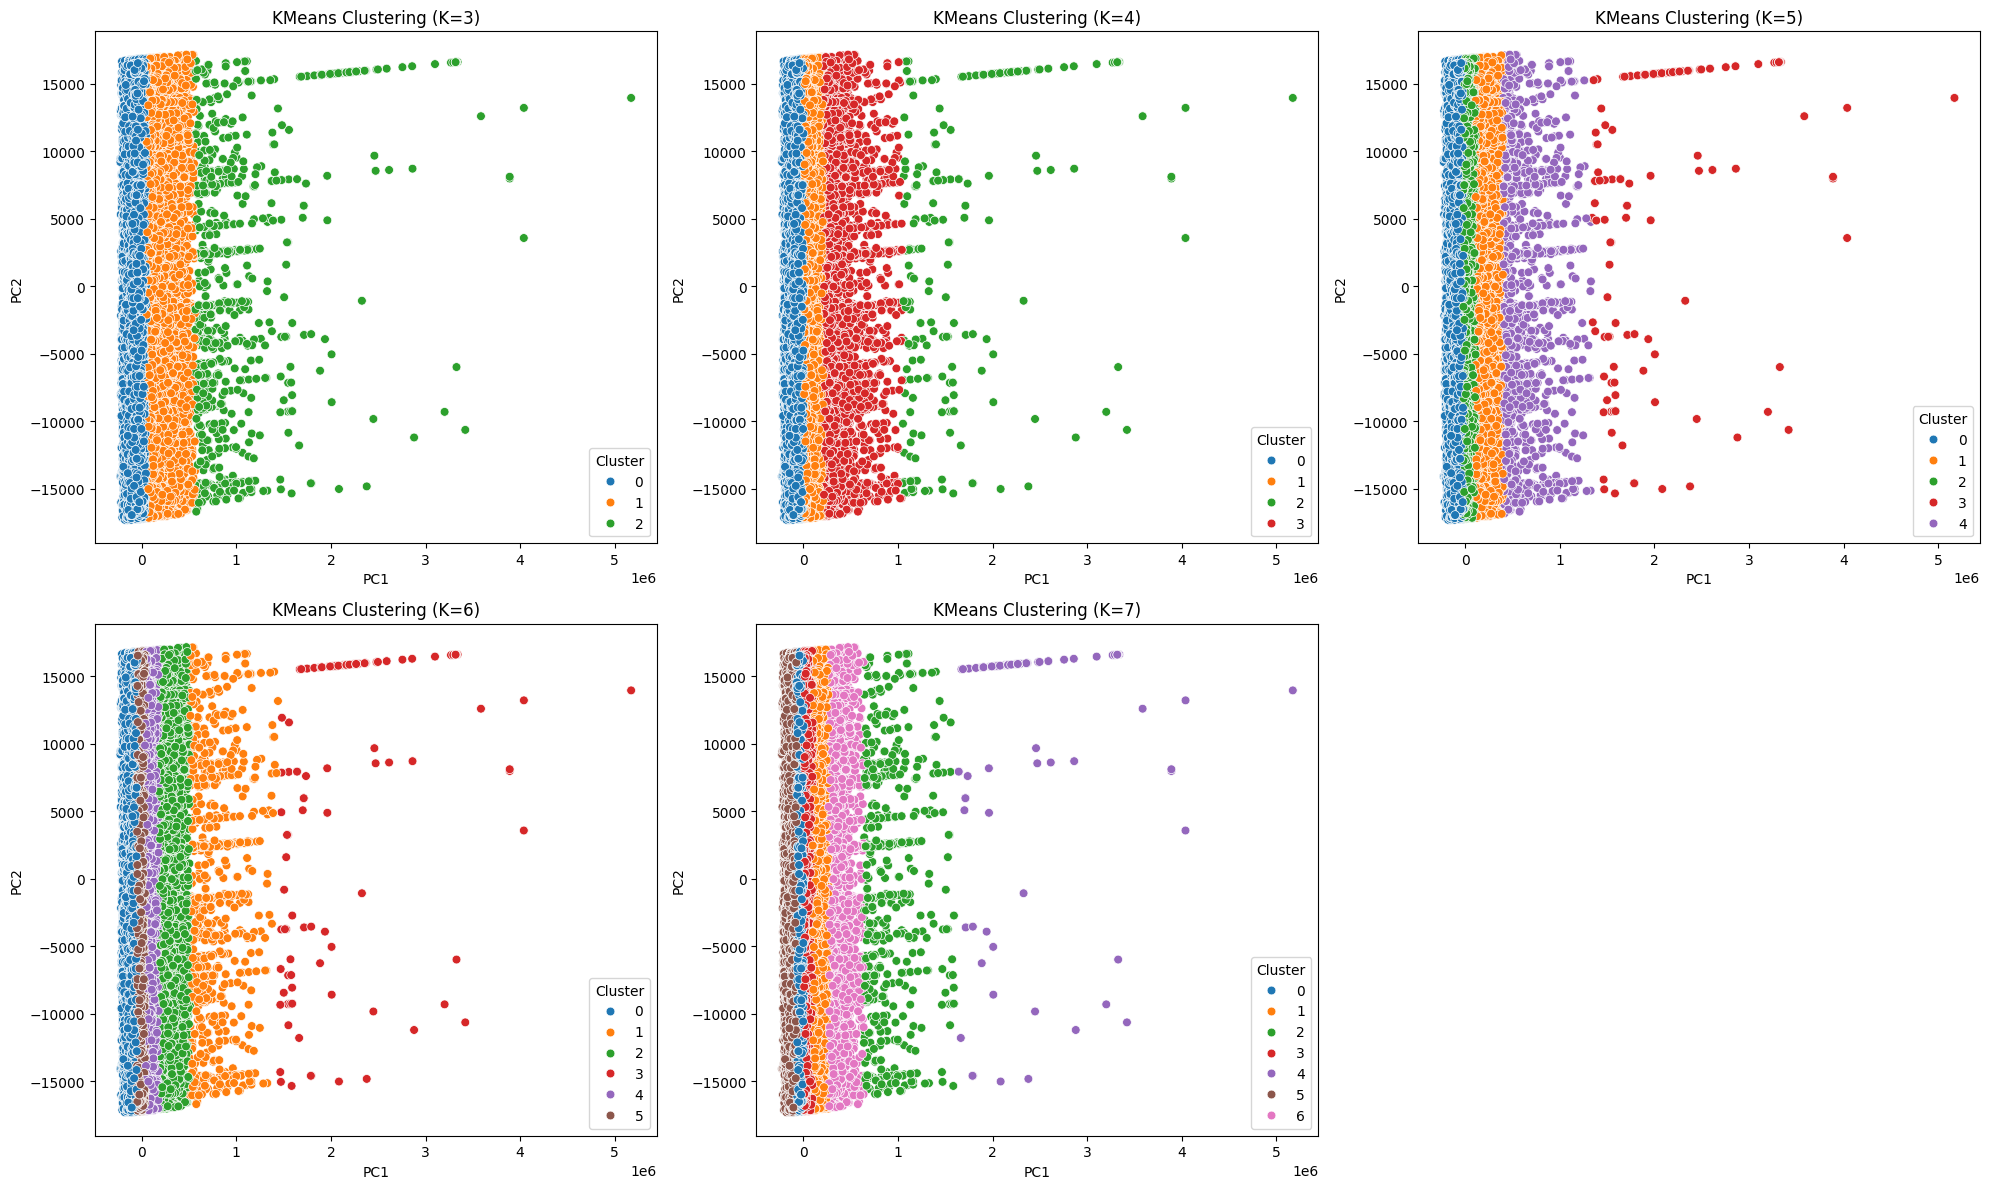

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(corr_data)
plt.figure(figsize=(20, 12))
#plot scatterplots for each # of clusters from 3 to 7
for i, k in enumerate(range(3, 8), 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(corr_data)
    plt.subplot(2, 3, i)
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='tab10', s=40)
    plt.title(f'KMeans Clustering (K={k})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

#Song Recomendation Algorithm
Tyler Adamson | u1355646@utah.edu | u1355646 <br>
Brian Keller | u1364562@utah.edu | u1364562<br>
Wyatt Young | young.wyatt@utah.edu | u1361848<br>

Background and Motivation. <br>
<br>
Discuss your motivations and reasons for choosing this project, especially any background or research interests that may have influenced your decision.

Our project is focused on using a dataset of spotify information to create an effective song recommendation system. Each of our group members use spotify and are often recommended songs based on the in place spotify recommendation system. Within our group and among many of our friends, dissatisfaction with spotify recommendations has been expressed at times. Outside of just our personal experiences, a sentiment of disappointment with spotify recommendations can be found on online forums and in surveys. There exists some research on customer satisfaction with spotify recommendations. The paper "Understanding and Evaluating User Satisfaction with Music Discovery"(https://doi.org/10.1016/j.elerap.2022.101145) covers user satisfaction with spotify's recommendation system and the aspects of listening that inform said satisfaction. A survey done for the paper reported that 65% of users expressed satisfaction with recent recommendations of 4 or higher on a 1-5 scale. Though those that express dissatisfaction with the song discovery system are in the minority, 65% is a metric that can certainly be improved on. With this metric in mind, it is worth investigating how Spotify determines what songs to recommend. Spotify recommendations are highly personalized, taking into account skips, listens and saves, as well as demographic information. It also takes into account genre and music information. The dataset we intend to use contains only information on songs, for example one song would have data corresponding to its acousticness, danceability, genre etc. We want to see if we can produce better or comparable results, in terms of customer satisfaction, by recommending songs solely based on genre and feature clustering. Will simplifying recommendations to be only based on music features help or harm recommendations? This can inform whether spotify's highly personalized recommendation system aims to make recommendations too specific, diving deeper into genres as opposed to broadening the music they offer to users. Our analysis will also hopefully allow us to introduce ourselves to new music we enjoy.<br>

Project Objectives. <br>
Provide the primary questions you are trying to answer in your project. What would you like to learn and accomplish? List the benefits.
This should include both questions about the data and any learning objectives you would like to fulfill. In other words, there are two kinds of benefits to address. <Br>
The primary questions we are trying to answer  and their respective benefits are as follows:
1. Can we create an effective music recommendation system based on song features?
- If we can create a effective music recommendation system, we can use it to reccomend music in a manner different from spotify or other big streaming services, hopefully offering a means of finding more new music.
2. Which features of songs included in our dataset best inform recommendations?
- If we can determine which features of music best inform recommendations, we can provide more accurate and interesting recommendations to users.
3. How does satisfaction with our recommendation system compare to that of spotify's?
- It is important to compare our satisfaction results with spotify's in order to determine if our system provides improved recommendations, and is thus worth using, or if the additional information used in spotify's recommendations gives it an edge, and we should seek to utilize more information in our system as well.

Data Description and Acquisition. <br>
<br>
Our dataset is a set of csv files. There is one, main data file with 171k rows. Each row is a song and each column is a feature of the song. There are 17 features included in this data. Most of these are numerical features, such as valence, acousticness, danceability, duration, energy, and explicit. Features like valence and acousticness are values on a scale between 0 and 1, whereas categorical features like explicit are either 0 or 1. There are non-numerical features such as artist. There are other data files in this dataset that group the data by artist, genre, and year. This dataset is found on Kaggle, called [Spotify dataset](https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset). According to its Kaggle page, it is available for download and use, and we have permission to use it for our project.<br> We will not have to scrape any data for the initial phase of the project, as our clustering will be based on the 171k songs in the spotify dataset. However, we may need to collect additional song data when testing our recommendation algorithm. If a song requested by a surveyed user is missing from the dataset, we may scrape its metadata from sources such as [Organize Your Music](http://organizeyourmusic.playlistmachinery.com/). No account is required, and the scraping of this data is permitted according to the [Spotify for Developers ToS](https://developer.spotify.com/documentation/web-api). This means we may use the Spotify API as an alternative method to retrieve song metadata. This method also does not require an account for basic functionality, but we will create an account if extended functionality is needed.<br>
  
Ethical Considerations. <br>
Complete a stakeholder analysis for your project.
Who may be affected by your project and its outcomes? How could you project be used for harm? <br>
<br>
The primary stakeholders in this project are music listeners (end users), artists and musicians, and music-streaming services. Music listeners may benefit from better music discovery but could be negatively impacted if the algorithm recommends music that is offensive to their personal beliefs. Artists could benefit from increased exposure if their music is recommended, but also could suffere if the algorithm disproporionately favors mainstream artisits over smaller, independent artisits. Music streaming services could benefit by adopting the recommendation system if it is useful, but in the same vein could also suffer if the project reveals issues in their existing recommendation algorithms. Secondary stakeholders include music data providers (like Kaggle and the Spotify API) and reserachers in data science. Data providers may have ethical concerns about data use and privacy, especially if scraping violate terms of service or if the data is used in ways that misrepresent its original intent. This is why we wil carefully pay attention to the API ToS and adhere to their guidelines. Reserachers could benefit from insights into clustering techniques applied to music data but could have ethical concerns over reinforcing biases in AI-driven recommendations. The project could present ethical concerns with biases towards certain genres, artists, or cultural influences. Specifically, recommendations could disadvantage independent or non-Western musicians. There is also a risk of misuse, such as manipulating playlists to artificially boost specific artists for profit. Addressing these ethical concerns requires careful datseet evaluation, ethical data handling, and transparency in algorithmic decision-making.  
<br>
Data Cleaning and Processing. <br>
Do you expect to do substantial data cleanup or data extraction? What quantities do you plan to derive from your data? How will data processing be implemented? <br>
<br>
  Many of the features in the dataset are already in numerical form, such as; acoustic, danceability, energy, loudness, tempo, and popularity metrics. Thus we expect a moderate data processing step before pushing to the kmeans model. The first step in preprocessing the data will be to check for null/missing values. If a small number of rows contain null values they will be dropped, if not, we will look at imputing numerical coilumns using median or a similar measure of central tendency. Next step will be to remove duplicate rows based on song title or id as those are our unique indexes in the dataset. Some numerical features may contain outlier values that could distort clustering. We will handle this by using a standard scalar on the numerical columns. Regarding categorical columns, the explicit column will be converted to binary(0=not explicit, 1=explicit), year and release_date are most likely identical so one will be dropped. To prepare the data for kmeans clustering, some categorical columns such as artists, name, and id will be dropped for clustering but used to label our data points for visualizations and prediction purposes. Data processing will be implemented in a Python environment after data is imported via Pandas and read_csv.
<br>

Exploratory Analysis. <br>
Which methods and visualizations are you planning to use to look at your dataset? <br>
<br>
  A correlation heatmap is a good start to understanding the linear relationships present between features. However, since those correlations will be understood in our kmeans model the focus will be on using a silhouette score plot to determine k and an elbow method to determine the SSE between features. This will ensure distinct cluster groups is present in the data only using a linear algorithm such as Loyds. If non-linear relationships are present t-SNE will be used to visualize these relationships. Obviously clustering results will be visualized and cluster centers. Incoming songs from participants will be visualized iwthin their assigned cluster. Once KNN is performed within the clusters songs to determine the nearest 5 songs for recommendation will be visualized as well. Finally, our questionarre results will be visualized to help us determine whether we were successfuly able to recommend valid songs to each listener. This will be done using matplotlib and sklearn.
<br>

Analysis Methodology. <br>
How are you planning to analyze your data?
What specific questions do you hope to calculate?
What methods (from class or otherwise) do you think you will use?<br>
<br>
Our primary analysis will focus on music similarity and recommendation effectiveness based on clustering and nearest neighbor retrieval. We will; assess feature distributions to understand the dataset, perform clustering with KMeans, evaluate how well the clusters group based on featurized data for each song, use KNN nearest neighbor searches within clusters to recommend songs and analyze how well they match user preferences, and analyze user feedback to assess the accuracy and relevance of recommendations.
<br>
**We hope to answer:** <br>
1. What is the optimal number of clusters for this dataset?
2. What features drive clustering?
3. How effective are the recommendations-do users recognize the recommended songs? Do users like the songs recommended?
4. Can user preferences be predicted from the dataset-do specific features correlate with positive user feedback?
5. Can this data be clustered accurately enough for proper recommendation based on acoustic properties of the songs?
6. Are spotify recommendations BS?
<br>
**Methods we plan to use:**
<br>
1. Preprocessing-imputations, feature engineering, etc.
2. Data visualizations-correlation heatmaps, scatterplots, clusters, etc.
3. Unsupervised ML-KMeans clustering
4. Similarity Searches-KNN
5. Rinsing and repeating
<br>
Project Schedule. <br>
Make sure that you plan your work so that you can avoid a big rush right before the final project deadline, and delegate different modules and responsibilities among your team members. Write this in terms of weekly deadlines.

---

## **Week 1: March 17 - March 23**    
- Load dataset and check for missing values, duplicates, and inconsistencies  
- Handle missing values through imputations
- Normalize/scale numerical features if needed   
- Create a correlation heatmap to identify redundant or highly correlated features     
---
## **Week 2: March 24 - March 30**   
- Determine which features are most relevant for clustering  
- Experiment with PCA or t-SNE if needed
- Perform KMeans clustering on the dataset with a range of K values  
- Use silhouette score and elbow method to determine the optimal K
- Visualize the clusters using scatterplots   
---
## **Week 3: March 31 - April 6**    
- Find a way to impute missing values for popularity
- Implement KNN on cluster subset of data to find the closest songs based on acoustic features
- Develop a function to take in user-provided songs and match them to the nearest cluster
- Retrieve the five closest songs from the cluster that are not identical to the input songs.  
---
## **Week 4: April 7 - April 13**  
- Create and deploy questionnare to n particpants determined based on timeline progress
- Generate recommendations and record user responses on familiarity and preference
- Analyze the effectiveness of recommendations based on user feedback  
- Identify patterns in features that correlate with positive feedback   
---
## **Week 5: April 14 - April 19**   
- Summarize findings and key insights from clustering and recommendation testing.  
- Create final visualizations and supporting analysis for the report.    
- Upload to personal git repos  

#Peer Feedback 3/20 <br>
What to cluster on?
 - Genre? <br>
How to decide between clusters?
 - Elbow Diagram <br>
How to survey people - using what model and what info should they give us?
 - what if they have a bias against a certain song?
 - what if they do not listen to much music?
 - what if they have more niche music taste?
 - recommend based on purely genre? <br>
 Ethical concerns with explicit music


#First Milestone 3/27 <br>
**Project Description:** <br>
To reiterate what is in the markdown cell above, our project aims to develop a music recommendation system using song feature data from a Spotify dataset. We'll apply unsupervised learning techniques, specifically KMeans clustering, to group songs based on their acoustic features such as danceability, valence, key, and acousticness. We will identify an optimal number of clusters using the elbow method and visualize our clusters using PCA. After clustering, we'll use K-Nearest Neighbors (KNN) to recommend songs similar to user-selected tracks. By comparing the satisfaction of users with our recommendations to Spotify's existing system, we aim to determine whether simplifying recommendations to rely solely on music features helps or harms user experience. <br>

**Data Description:** <br>
Our dataset was downloaded from Kaggle into a CSV format and  consists of 171,000 Spotify songs with 17 features per song, including numerical attributes like valence, acousticness, danceability, and categorical attributes such as explicitness and artist. <br>

**Ethical Data Concerns:** <br>
Our ethical data concerns have not changed since the original project write up. We will continue to ensure we're adhering to the Spotify API ToS as stated above. <br>

**Methods:** <br>
Data was read into a dataframe using the Pandas library. The dataframe contained 19 columns, two of which were dropped, these being release date and id. Release date was dropped as we believe the year of release to be sufficient for our data analysis, the id was also dropped and each song name was encoded as that song's id. The artists/groups of artists on each song were encoded to numerical values. The numeric values from the dataframe were visualized as histograms to determine which needed to be scaled. Using Seaborn a  correlation heatmap was then created for all features outside of name, as names of songs are often arbitrary in terms of correlation to other features. Areas that showed the highest correlation were in the rows representing, popularity, year, loudness and energy. The popularity correlations will need to be reexamined once we impute values for the missing popularity values from older songs. Loudness, energy, and year, however, could be important features to consider in our song suggestions. Using SciKit-Learn silhouette and inertia scores for a range of k values were visualized assiting us in determining the best k for Loyds algorithm on this dataset. Also using sklearn, Principal Component Analysis (PCA) was completed on our dataset for a range of k values and visualized. <br>

**Preliminary Results:** <br>
Most of the data is already scaled and numerical, but there are a couple features that could use attention. Our current encoding of artist fails to capture the nuances of multiple artists on a song, simply giving the group its own encoding. We are trying to devise a way to separate the artsits on each song and give each the proper encoding, so that songs with multiple artists are correctly encoded with the numbers that correspond to the individual artists. Furthermore, the popularity data on songs before a certain date is non-existant, so we are trying to determine the best way to impute data for these songs without skewing the entire feature, as a large portion of songs lack any rating. The elbow method results and sihouettes produced for k values from 2-10 indicated that clustering of our dataset whould be completed somewhere in the range of k=3-7. We created PCA scatter plots of our dataset for each of the k values in this range and the clearest distinctions between clusters could be seen at k values of 3-5. The data is also clustered in a way such that the 1st principal component from our PCA seemed to have captured the most variability in the dataset. Regarding next steps, more research must be done to determine what more we can learn form the PCA. As of now we do not forsee any significant deviations from our original project plan.
<br>

**Completed Milestones:** <br>
*   Loaded and cleaned dataset
*   Scaled and Encoded features, though some could use additional attention
*   Created a heatmap to identify highly correlated features
*   Used a silhouette score and the elbow method to determine K values
*   Performed PCA on K values from 3-7 based on silhouette/elbow
<br>

**Methods Milestones:** <br>
* Determine how/why variability was captured as such using PCA for our dataset and how to leverage that variation between features.
* Determine how best to encode artists column in order to capture each artists contribution to a song individually. (without blowing up feature space)
* Start developing KNN and applying to certain songs in dataset to understand currently clustered groups.
* Start gathering peer data for recommendation.
<br>

**Summary:** <br>
We are on pace for project completion based on the original project write up. Clusters have been visualized using PCA. A potential bottleneck could be dealing with certain feature columns such as artists but frankly if there wasn't at least that adversity the whole project would be pretty plug and chug so good stuff so far. Team has been working great together and we have a clear direction on what needs to be completed next.
<br>